In [13]:
import netCDF4  #need to import in order for jupyter to take data from online

In [14]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt, ticker
from matplotlib.colors import LogNorm
from datetime import datetime
#from mpl_toolkits.basemap import Basemap 
import xarray as xr   #takes  online data and analyzes it

#filename is URL taken from NASA's Ocean data color website
filename = 'https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2018/030/A2018030.L3m_DAY_CHL_chl_ocx_9km.nc'
data = xr.open_dataset(filename)  #opening data using xarray
print(data)

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 2160, lon: 4320, rgb: 3)
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.79167 89.708336 89.625 ...
  * lon      (lon) float32 -179.95833 -179.875 -179.79166 -179.70833 ...
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    palette  (rgb, eightbitcolor) int8 ...
    chl_ocx  (lat, lon) float32 ...
Attributes:
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    product_name:                      A2018030.L3m_DAY_CHL_chl_ocx_9km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    day
    processing_version:                2018.0
    date_created:                      2018-03-07T14:14:21.000Z
    history:                           l3mapge

In [15]:
print(data['chl_ocx'])  #only printing the data from the chlorophyll variable

# print attributes (metadata)
print('')
print('examples of dataset attributes: time_coverage_start, time_coverage_end')
print(data.attrs['time_coverage_start'])    
print(data.attrs['time_coverage_end'])
print('')
print('example of variable attributes: units')
print(data['chl_ocx'].attrs['units'])  #printing the units associated with the chlorophyll 

<xarray.DataArray 'chl_ocx' (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.79167 89.708336 89.625 ...
  * lon      (lon) float32 -179.95833 -179.875 -179.79166 -179.70833 ...
Attributes:
    long_name:      Chlorophyll Concentration, OC3 Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_chlorophyll_concentration_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      O'Reilly, J.E., and 24 Coauthors, 2000: SeaWiFS Postlaunc...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

examples of dataset attributes: time_coverage_start, time_coverage_end
2018-01-30T00:30:01.000Z
2018-01-31T02:59:59.000Z

example of variable attributes: units
mg m^-3


In [23]:
# coordinates that define the subset to be extracted
lon_min = -124.   #choosing min lat and lon and max lat and lon to take data from to plot
lon_max = -120.
lat_min = 36.
lat_max = 39.

# find indices of dataset in this box
lon_all = np.array(data['lon'])       #finding all the longitude in the data set
lat_all = np.array(data['lat'])      #fidning all the latitude in the data set
loni, = np.where((lon_all > lon_min) & (lon_all < lon_max))    #getting longitude data between these indices
lati, = np.where((lat_all > lat_min) & (lat_all < lat_max))    #getting latitude data between these indices

# create variables for subset
lon = lon_all[loni]     #using correct index for longitude
lat = lat_all[lati]     #using correct index for latitude
LON,LAT = np.meshgrid(lon,lat)
chl_subset = np.array(data['chl_ocx'][lati[0]:(lati[-1]+1),
                             loni[0]:(loni[-1]+1)])

# create masked array
chl_mask = np.ma.masked_invalid(chl_subset)


<IPython.core.display.Javascript object>


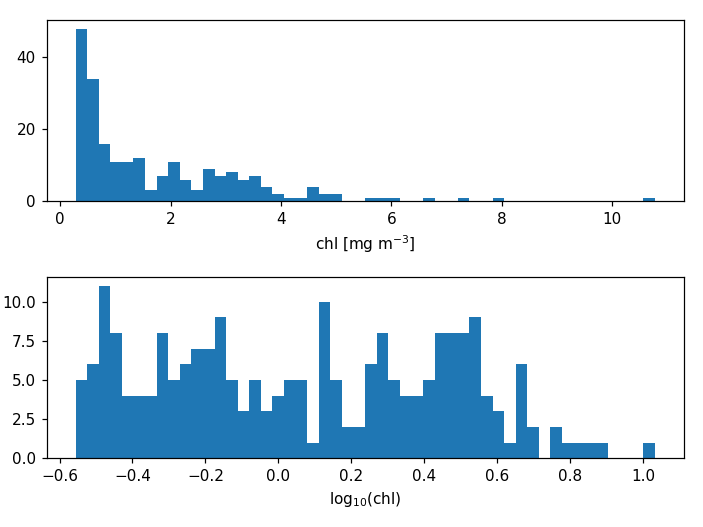

In [21]:
# create 1-D array with no NaNs for histogram
goodi = np.where(np.isfinite(chl_subset)) # indices of finite data values
chl_finite_1d = np.reshape(chl_subset[goodi],-1) # reshape 2d array to 1d

plt.figure()    #plotting a figure
plt.subplot(2,1,1)
hist1 = plt.hist(chl_finite_1d,bins=50)   #making histogram using isfinite to disregard nans
plt.xlabel('chl [mg m$^{-3}$]')    #making x label
plt.subplot(2,1,2)    #making second figure
hist2 = plt.hist(np.log10(chl_finite_1d),bins=50)   #making a histogram using a logarithmic scale
plt.xlabel('log$_{10}$(chl)')
plt.tight_layout()

<IPython.core.display.Javascript object>


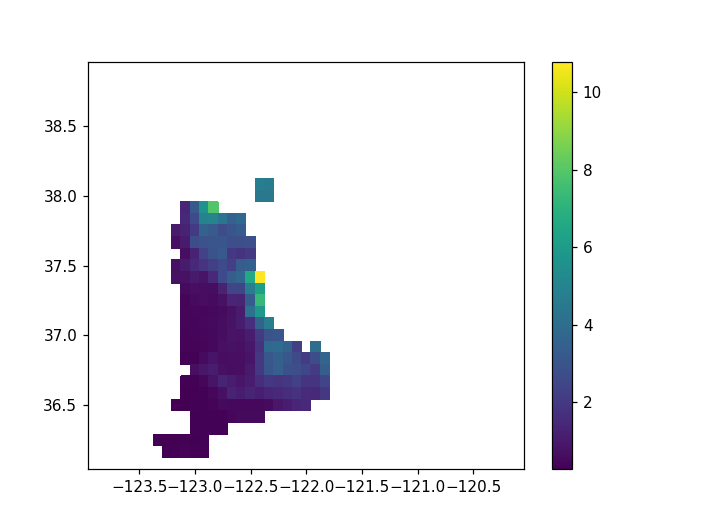

<IPython.core.display.Javascript object>


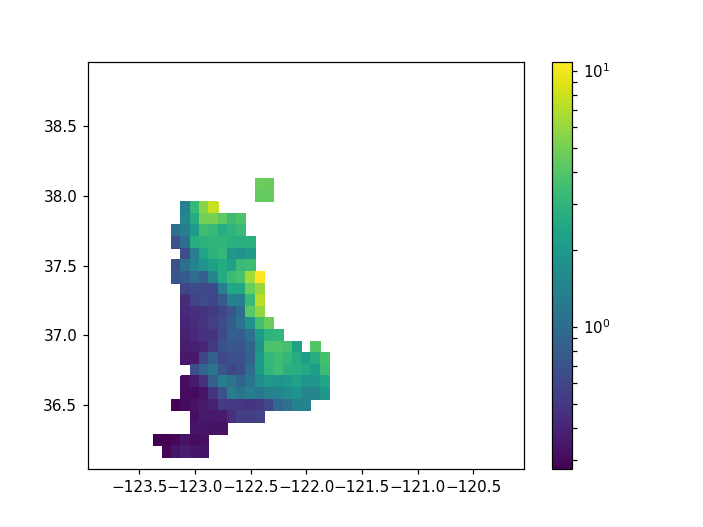

In [37]:
plt.figure()
plt.pcolor(lon,lat,chl_mask)  #plotting a color map of chlorophyll concentration
plt.colorbar()

plt.figure()
plt.pcolor(lon,lat,chl_mask,norm=LogNorm())   #plotting color map of chlorophyll concentration in logarithimic numbers
plt.colorbar()

In [18]:
#preliminary data shows the chlorophyll concentration around monterey bay. Hope to get basemap working to have a coast line of California. 



